In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
#import cv2
import tensorflow as tf
import tensorflow.keras.layers as L
from PIL import Image, ImageFile

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

In [2]:
print(tf.__version__)

2.6.3


In [3]:
folder = '../input/cbir-dataset/dataset/'
photo = [folder+x for x in os.listdir(folder)]
photos = pd.DataFrame()
photos['dir'] = photo

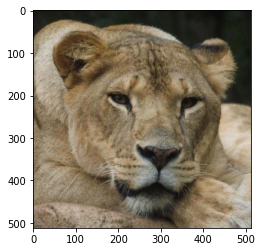

In [5]:
def display(path_img):
    plt.imshow(plt.imread(path_img))
    plt.show()
display(photos['dir'][48])

In [7]:
img_arr=[]
for file in photos['dir']:
    img = Image.open(file)
    img = np.array(img.resize((224, 224)))
    img_arr.append(img)


In [8]:
img_arr = np.array(img_arr)/255.0
img_arr.shape

(4738, 224, 224, 3)

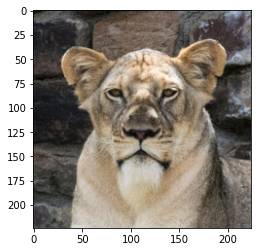

In [9]:
plt.imshow(img_arr[1])
plt.show()

In [10]:
model = tf.keras.Sequential([
    L.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    L.Conv2D(64, (3, 3), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=2, padding='same'),
    L.Conv2D(128, (3, 3), padding='same', activation='relu'),
    L.Conv2D(128, (3, 3), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=2, padding='same'),
    L.Conv2D(256, (3, 3), padding='same', activation='relu'),
    L.Conv2D(256, (3, 3), padding='same', activation='relu'),
    L.Conv2D(256, (3, 3), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=2, padding='same'),
    L.Conv2D(512, (3, 3), padding='same', activation='relu'),
    L.Conv2D(512, (3, 3), padding='same', activation='relu'),
    L.Conv2D(512, (3, 3), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=2, padding='same'),
    L.Conv2D(512, (3, 3), padding='same', activation='relu'),
    L.Conv2D(512, (3, 3), padding='same', activation='relu'),
    L.Conv2D(512, (3, 3), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=2, padding='same'),
    L.Flatten(),
    L.Dense(4096, activation='relu'),
    L.Dense(4096, activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

2022-05-17 03:34:25.252532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 03:34:25.365224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 03:34:25.366045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 03:34:25.367193: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
# extract features from database image
feature = model.predict(img_arr, verbose=1)

2022-05-17 03:34:35.736364: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2852806656 exceeds 10% of free system memory.
2022-05-17 03:34:38.803165: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2852806656 exceeds 10% of free system memory.
2022-05-17 03:34:40.869877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-17 03:34:41.920280: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


149/149 [==============================] - 19s 62ms/step


In [12]:
model.save('model.h5')

2022-05-17 03:35:01.667724: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.


In [13]:
import pickle
# store features in pickle
pickle.dump(feature, open(os.path.join('./', 'features.pkl'), 'wb'))

In [14]:
def euclidean(a, b):
    # compute and return the euclidean distance between two vectors
    return np.linalg.norm(a - b)

In [15]:
#compute euclidean distances for query images and database image
def perform_search(queryFeatures, index, maxResults=64):
    results = []
    
    for i in range(0, len(index)):
        d = euclidean(queryFeatures, index[i])
        results.append((d, i))
        
    # sort the results and grab the top ones
    results = sorted(results)[:maxResults]
    # return the list of results
    return results

In [22]:
# extract features of query image
index = 19
query = img_arr[index].reshape((1,224,224,3))
query = model.predict(query)

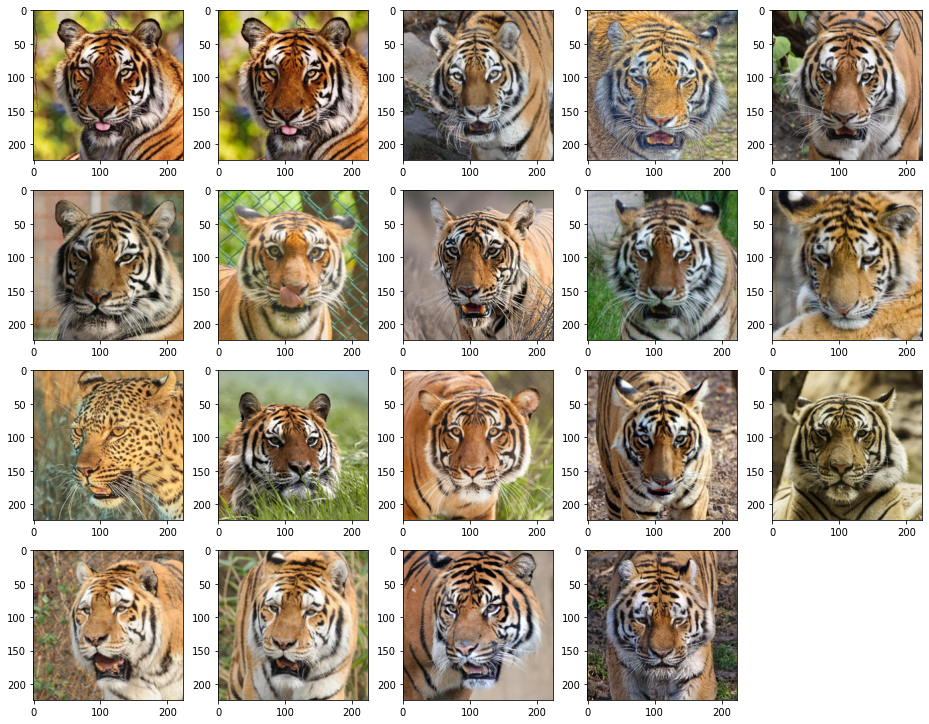

In [23]:
result = perform_search(query, feature, 20)
arr = []
for a, b in result:
    arr.append(b)
fig = plt.figure(figsize=(16, 16))
for i in range(1,20):
    #img = plt.imread(photo[arr[i-1]])
    fig.add_subplot(5, 5, i)
    plt.imshow(img_arr[arr[i-1]])
plt.show()